In [ ]:
!pip install torch torchvision torchaudio scikit-learn pandas pillow matplotlib opencv-python seaborn --index-url https://download.pytorch.org/whl/cu118 scikit-learn \
    --extra-index-url=https://pypi.nvidia.com \
    "cudf-cu12==25.4.*" "dask-cudf-cu12==25.4.*" "cuml-cu12==25.4.*" \
    "cugraph-cu12==25.4.*" "nx-cugraph-cu12==25.4.*" "cuspatial-cu12==25.4.*" \
    "cuproj-cu12==25.4.*" "cuxfilter-cu12==25.4.*" "cucim-cu12==25.4.*" \
    "pylibraft-cu12==25.4.*" "raft-dask-cu12==25.4.*" "cuvs-cu12==25.4.*" \
    "nx-cugraph-cu12==25.4.*"


Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 723.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 649.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 807.4 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 1.1 MB/s eta 0:00:0000:0100:27
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 991.4 kB/s eta 0:00:0000:0100:16
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 915.0 kB/s eta 0:00:0000:0100:05
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 961.7 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 888.6 kB/s eta 0:00:0000:0100:05
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 383.6 kB/s eta 0:00:0000:0100:12
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 717.9 kB/s eta 0:00:0000:0100:06
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import torch
from torch import nn, functional as F
from torch.utils.data import DataLoader,Dataset
import numpy as np
from sklearn.decomposition import PCA,FactorAnalysis
import os
import matplotlib.pyplot as plt
import cv2

In [3]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
device

'cuda'

In [10]:
torch.cuda.is_available()


True

# D2CNN

In [21]:
class FirstCNN(nn.Module):
    def __init__(self):
        super(FirstCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.pool3(x)
        x = F.relu(self.conv4(x))
        x = self.pool4(x)
        x = torch.flatten(x, 1)
        return x


In [22]:
class SecondCNN(nn.Module):
    def __init__(self):
        super(SecondCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 256, kernel_size=7, padding=3)
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(256, 128, kernel_size=5, padding=2)
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(128, 96, kernel_size=3, padding=1)
        self.pool3 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv4 = nn.Conv2d(96, 96, kernel_size=3, padding=1)
        self.pool4 = nn.AvgPool2d(kernel_size=2, stride=2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.pool3(x)
        x = F.relu(self.conv4(x))
        x = self.pool4(x)
        x = torch.flatten(x, 1)
        return x

In [23]:
class ThirdCNN(nn.Module):
    def __init__(self):
        super(ThirdCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 96, kernel_size=5, padding=2)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(96, 128, kernel_size=5, padding=2)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=7, padding=3)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.pool3(x)
        x = F.relu(self.conv4(x))
        x = self.pool4(x)
        x = torch.flatten(x, 1)
        return x

In [30]:
class FourthCNN(nn.Module):
    def __init__(self):
        super(FourthCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.AvgPool2d(kernel_size=3, stride=3)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.pool2 = nn.AvgPool2d(kernel_size=3, stride=3)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.pool3 = nn.AvgPool2d(kernel_size=3, stride=3)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=5, padding=2)
        self.pool4 = nn.AvgPool2d(kernel_size=3, stride=3)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.pool3(x)
        x = F.relu(self.conv4(x))
        x = self.pool4(x)
        x = torch.flatten(x, 1)
        return x


In [ ]:
class D2CNN(nn.Module):
    def __init__(self, num_classes=7, pca_n_components=128, fa_n_components=128):
        super(D2CNN, self).__init__()
        self.first_cnn = FirstCNN()
        self.second_cnn = SecondCNN()
        self.third_cnn = ThirdCNN()
        self.fourth_cnn = FourthCNN()
        
        # Dimensionality reduction parameters
        self.pca_n_components = pca_n_components
        self.fa_n_components = fa_n_components
        
        # Fully connected classifier
        self.fc1 = nn.Linear(pca_n_components + fa_n_components, 256)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(128, 64)
        self.dropout3 = nn.Dropout(0.2)
        self.fc4 = nn.Linear(64, num_classes)
        
        # Initialize PCA and FA (will be fit during training)
        self.pca = None
        self.fa = None
        
    def forward(self, x):
        # Extract features from all CNNs
        features1 = self.first_cnn(x)
        features2 = self.second_cnn(x)
        features3 = self.third_cnn(x)
        features4 = self.fourth_cnn(x)
        
        # Convert features to numpy for dimensionality reduction
        features1_np = features1.detach().cpu().numpy()
        features2_np = features2.detach().cpu().numpy()
        features3_np = features3.detach().cpu().numpy()
        features4_np = features4.detach().cpu().numpy()
        
        # Apply PCA to features from first and second CNNs
        if self.pca is None:
            combined_features = np.concatenate([features1_np, features2_np], axis=1)
            self.pca = PCA(n_components=self.pca_n_components)
            self.pca.fit(combined_features)
            
        pca_features = self.pca.transform(np.concatenate([features1_np, features2_np], axis=1))
        
        # Apply FA to features from third and fourth CNNs
        if self.fa is None:
            combined_fa_features = np.concatenate([features3_np, features4_np], axis=1)
            self.fa = FactorAnalysis(n_components=self.fa_n_components)
            self.fa.fit(combined_fa_features)
            
        fa_features = self.fa.transform(np.concatenate([features3_np, features4_np], axis=1))
        
        # Combine reduced features
        combined_features = np.concatenate([pca_features, fa_features], axis=1)
        
        # Remove duplicate features using correlation matrix
        corr_matrix = np.corrcoef(combined_features, rowvar=False)
        upper_tri = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
        to_drop = [column for column in range(combined_features.shape[1]) 
                  if any(corr_matrix[column, row] > 0.95 for row in range(column+1, combined_features.shape[1]))]
        
        if to_drop:
            combined_features = np.delete(combined_features, to_drop, axis=1)
        
        # Convert back to tensor
        combined_features = torch.from_numpy(combined_features).float().to(device)
        
        # Fully connected classifier
        x = F.relu(self.fc1(combined_features))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.fc4(x)
        
        return x

In [ ]:
model = D2CNN()
model

In [35]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=80):
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct / total
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        
        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)
                
                outputs = model(images)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        val_loss = val_loss / len(val_loader)
        val_acc = 100 * correct / total
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
    
    return train_losses, val_losses, train_accs, val_accs

In [36]:
def evaluate_model(model, test_loader):
    model.eval()
    all_labels = []
    all_preds = []
    
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())
    
    # Classification report
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']))
    
    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'],
                yticklabels=['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [39]:
class HAM10000Dataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df
        self.img_dir = img_dir
        self.transform = transform
        self.classes = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.df.iloc[idx, 0] + '.jpg')
        image = Image.open(img_path)
        label = self.df.iloc[idx, 1]
        
        if self.transform:
            image = self.transform(image)
            
        return image, torch.tensor(label, dtype=torch.long)

In [ ]:
metadata_path = 'HAM10000_metadata.csv'
img_dir = 'HAM10000_images'

# Read metadata
df = pd.read_csv(metadata_path)

# Map lesion types to numerical labels
lesion_type_dict = {
    'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3,
    'mel': 4, 'nv': 5, 'vasc': 6
}
df['label'] = df['dx'].map(lesion_type_dict)

# Split data into train, validation, and test sets
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.125, stratify=train_df['label'], random_state=42)  # 0.125 x 0.8 = 0.1

# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create datasets
train_dataset = HAM10000Dataset(train_df, img_dir, transform)
val_dataset = HAM10000Dataset(val_df, img_dir, transform)
test_dataset = HAM10000Dataset(test_df, img_dir, transform)

# Create dataloaders
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize model, loss, and optimizer
model = D2CNN(num_classes=7).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Train the model
train_losses, val_losses, train_accs, val_accs = train_model(
    model, train_loader, val_loader, criterion, optimizer, num_epochs=80
)

# Plot training and validation metrics
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Accuracy')
plt.plot(val_accs, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on test set
evaluate_model(model, test_loader)

# A  robust  CNN  Deep  Learning  and  InceptionV3  model  Techniques for Enhanced Skin Cancer Detection

In [2]:
def directional_closing(image, kernel_size, angle_deg):
    # Create a linear structuring element at the given angle
    kernel = cv2.getStructuringElement(
        cv2.MORPH_RECT, 
        (kernel_size, kernel_size))
    
    # Rotate the kernel to the desired angle
    rotation_matrix = cv2.getRotationMatrix2D(
        (kernel_size // 2, kernel_size // 2), 
        angle_deg, 1)
    kernel_rotated = cv2.warpAffine(
        kernel, rotation_matrix, 
        (kernel_size, kernel_size), 
        flags=cv2.INTER_NEAREST)
    
    # Perform closing (dilation + erosion)
    closed = cv2.morphologyEx(
        image, cv2.MORPH_CLOSE, 
        kernel_rotated)
    
    return closed

In [13]:
img = cv2.imread("input.jpg")
b, g, r = cv2.split(img)  # Split into Blue, Green, Red

In [14]:
_, bin_r = cv2.threshold(r, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, bin_g = cv2.threshold(g, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, bin_b = cv2.threshold(b, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [63]:
kernel_size = 3
# Apply to all channels
closed_r_0 = directional_closing(bin_r, kernel_size, 0)
closed_r_45 = directional_closing(bin_r, kernel_size, 45)
closed_r_90 = directional_closing(bin_r, kernel_size, 90)

closed_g_0 = directional_closing(bin_g, kernel_size, 0)
closed_g_45 = directional_closing(bin_g, kernel_size, 45)
closed_g_90 = directional_closing(bin_g, kernel_size, 90)

closed_b_0 = directional_closing(bin_b, kernel_size, 0)
closed_b_45 = directional_closing(bin_b, kernel_size, 45)
closed_b_90 = directional_closing(bin_b, kernel_size, 90)

# Combine results (max across angles)
hair_mask_r = cv2.bitwise_or(closed_r_0, cv2.bitwise_or(closed_r_45, closed_r_90))
hair_mask_g = cv2.bitwise_or(closed_g_0, cv2.bitwise_or(closed_g_45, closed_g_90))
hair_mask_b = cv2.bitwise_or(closed_b_0, cv2.bitwise_or(closed_b_45, closed_b_90))

In [64]:
def bilinear_inpaint(img, mask):
    inpainted = img.copy()
    height, width = img.shape[:2]
    
    # Get all hair pixel coordinates
    hair_y, hair_x = np.where(mask == 255)
    
    for y, x in zip(hair_y, hair_x):
        # Find nearest non-hair pixels in 4 directions
        left_val = right_val = top_val = bottom_val = None
        
        # Search left (until we hit a non-hair pixel or image boundary)
        for dx in range(1, x+1):
            if mask[y, x - dx] == 0:
                left_val = img[y, x - dx]
                break
        
        # Search right
        for dx in range(1, width - x):
            if mask[y, x + dx] == 0:
                right_val = img[y, x + dx]
                break
        
        # Search top
        for dy in range(1, y+1):
            if mask[y - dy, x] == 0:
                top_val = img[y - dy, x]
                break
        
        # Search bottom
        for dy in range(1, height - y):
            if mask[y + dy, x] == 0:
                bottom_val = img[y + dy, x]
                break
        
        # Average available neighbor values (bilinear interpolation)
        neighbors = []
        if left_val is not None:
            neighbors.append(left_val)
        if right_val is not None:
            neighbors.append(right_val)
        if top_val is not None:
            neighbors.append(top_val)
        if bottom_val is not None:
            neighbors.append(bottom_val)
        
        if neighbors:
            inpainted[y, x] = np.mean(neighbors, axis=0)
    
    return inpainted

In [90]:
final_hair_mask = cv2.bitwise_or(hair_mask_r, cv2.bitwise_or(hair_mask_g, hair_mask_b))
final_hair_mask = cv2.morphologyEx(final_hair_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8)) 


In [91]:
img_no_hair = bilinear_inpaint(img, final_hair_mask)
img_no_hair = cv2.cvtColor(img_no_hair, cv2.COLOR_BGR2RGB)

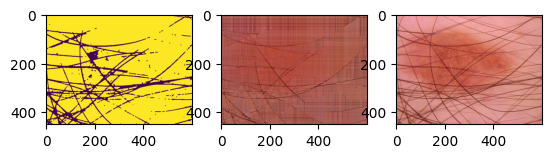

In [92]:
plt.subplot(1,3,1)
plt.imshow(final_hair_mask)
plt.subplot(1,3,2)
plt.imshow(img_no_hair)
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

In [94]:
def remove_hair(image_path):
    # Read the image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Image not found")

    # Split into RGB channels
    b, g, r = cv2.split(img)

    # Define angles and kernel parameters
    angles = [0, 45, 90]
    kernel_length = 15  # Adjust based on hair thickness

    # Create line kernels for morphological operations
    kernels = []
    for angle in angles:
        if angle == 0:
            kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
        elif angle == 90:
            kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
        else:  # 45 degrees
            kernel = np.zeros((kernel_length, kernel_length), dtype=np.uint8)
            cv2.line(kernel, (0, 0), (kernel_length-1, kernel_length-1), 1, thickness=1)
        kernels.append(kernel)

    # Process each channel to create hair masks
    channel_masks = []
    for channel in [b, g, r]:
        # Binarize and invert to highlight hair as white
        _, thresh = cv2.threshold(channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        thresh = cv2.bitwise_not(thresh)

        # Apply morphological closing for each angle
        closed_imgs = []
        for kernel in kernels:
            closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
            closed_imgs.append(closed)
        
        # Combine results using OR
        combined = cv2.bitwise_or(closed_imgs[0], closed_imgs[1])
        combined = cv2.bitwise_or(combined, closed_imgs[2])
        channel_masks.append(combined)

    # Combine channel masks to create final hair mask
    final_mask = cv2.bitwise_or(channel_masks[0], channel_masks[1])
    final_mask = cv2.bitwise_or(final_mask, channel_masks[2])

    # Apply inpainting to remove hair
    inpainted = cv2.inpaint(img, final_mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

    return inpainted, final_mask

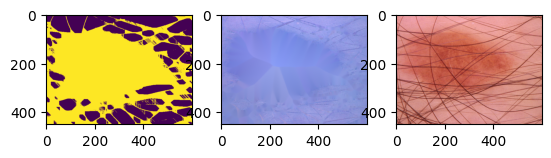

In [96]:
# Example usage
input_path = "input.jpg"
output_image, mask = remove_hair(input_path)
cv2.imwrite("output_image.jpg", output_image)

plt.subplot(1,3,1)
plt.imshow(mask)
plt.subplot(1,3,2)
plt.imshow(output_image)
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));